In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# set the options to see all columns, rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 1. Loading Files

In [6]:
# Reading a file with the header.
colnames = ['symboling', 'normalized-losses', 'make', 'fuel-type','aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
           'engine-size','fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
data_raw = pd.read_csv("imports-85.data.csv", names=colnames, header=None)

In [29]:
data = data_raw.copy()

In [30]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

# 2. Data Cleansing

In [32]:
data['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
128     6
134     6
104     6
95      5
85      5
74      5
103     5
94      5
65      5
168     5
102     5
106     4
93      4
148     4
118     4
122     4
154     3
83      3
125     3
101     3
137     3
115     3
87      2
164     2
188     2
110     2
89      2
129     2
145     2
153     2
119     2
192     2
194     2
197     2
81      2
113     2
158     2
108     2
186     1
107     1
121     1
78      1
231     1
77      1
98      1
90      1
256     1
142     1
Name: normalized-losses, dtype: int64

In [33]:
# make nan values to deal with those missings
data = data.replace('?', np.nan)

In [34]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

#### Too many missing data in normalized-losses, so drop 41 rows if normalized-losses missing.

In [35]:
data=data[pd.notnull(data['normalized-losses'])]

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 3 to 204
Data columns (total 26 columns):
symboling            164 non-null int64
normalized-losses    164 non-null object
make                 164 non-null object
fuel-type            164 non-null object
aspiration           164 non-null object
num-of-doors         163 non-null object
body-style           164 non-null object
drive-wheels         164 non-null object
engine-location      164 non-null object
wheel-base           164 non-null float64
length               164 non-null float64
width                164 non-null float64
height               164 non-null float64
curb-weight          164 non-null int64
engine-type          164 non-null object
num-of-cylinders     164 non-null object
engine-size          164 non-null int64
fuel-system          164 non-null object
bore                 160 non-null object
stroke               160 non-null object
compression-ratio    164 non-null float64
horsepower           164 non-nul

### 2-1. Filling Missing Values

In [37]:
# check which column has misssing values
null_arr = data.columns[data.isnull().any()].tolist()
print(null_arr)

['num-of-doors', 'bore', 'stroke']


In [38]:
data['num-of-doors'].value_counts()

four    95
two     68
Name: num-of-doors, dtype: int64

In [39]:
data['num-of-doors'] = data['num-of-doors'].fillna('four')

#### Generally a car has four doors, so I put 'four' above

In [40]:
null_arr = data.columns[data.isnull().any()].tolist()
print(null_arr)

['bore', 'stroke']


In [41]:
data[null_arr].describe()

,bore,stroke
count,160,160
unique,33,31
top,3.62,3.15
freq,20,14


In [42]:
data[null_arr] = data[null_arr].astype(np.float)

In [43]:
data[null_arr] = data[null_arr].fillna(data[null_arr].median())

In [48]:
# filling all nan values.
data.isnull().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

#### done with filling with missing values

### 2-2. Changing dtypes after filling the missing values

In [74]:
raw_data = data.copy()

In [75]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 3 to 204
Data columns (total 26 columns):
symboling            164 non-null int64
normalized-losses    164 non-null object
make                 164 non-null object
fuel-type            164 non-null object
aspiration           164 non-null object
num-of-doors         164 non-null object
body-style           164 non-null object
drive-wheels         164 non-null object
engine-location      164 non-null object
wheel-base           164 non-null float64
length               164 non-null float64
width                164 non-null float64
height               164 non-null float64
curb-weight          164 non-null int64
engine-type          164 non-null object
num-of-cylinders     164 non-null object
engine-size          164 non-null int64
fuel-system          164 non-null object
bore                 164 non-null float64
stroke               164 non-null float64
compression-ratio    164 non-null float64
horsepower           164 non-n

In [76]:
# numeric but objective type
objective_arr = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price' ]

In [77]:
raw_data[objective_arr] = raw_data[objective_arr].astype(np.float)

In [78]:
raw_data['normalized-losses'] = raw_data['normalized-losses'].astype(float)

In [79]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 3 to 204
Data columns (total 26 columns):
symboling            164 non-null int64
normalized-losses    164 non-null float64
make                 164 non-null object
fuel-type            164 non-null object
aspiration           164 non-null object
num-of-doors         164 non-null object
body-style           164 non-null object
drive-wheels         164 non-null object
engine-location      164 non-null object
wheel-base           164 non-null float64
length               164 non-null float64
width                164 non-null float64
height               164 non-null float64
curb-weight          164 non-null float64
engine-type          164 non-null object
num-of-cylinders     164 non-null object
engine-size          164 non-null float64
fuel-system          164 non-null object
bore                 164 non-null float64
stroke               164 non-null float64
compression-ratio    164 non-null float64
horsepower           164 

### Checking distribution of target values before going further

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


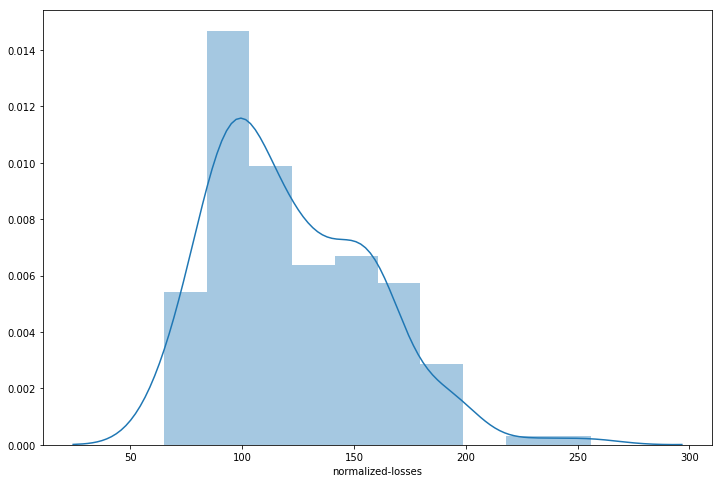

In [80]:
plt.figure(figsize=(12,8))
sns.distplot(raw_data['normalized-losses'])

#### trying to take log to 'normalized-losses'

In [121]:
log_data = raw_data.copy()

In [122]:
log_data['normalized-losses'] = np.log(log_data['normalized-losses'])

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


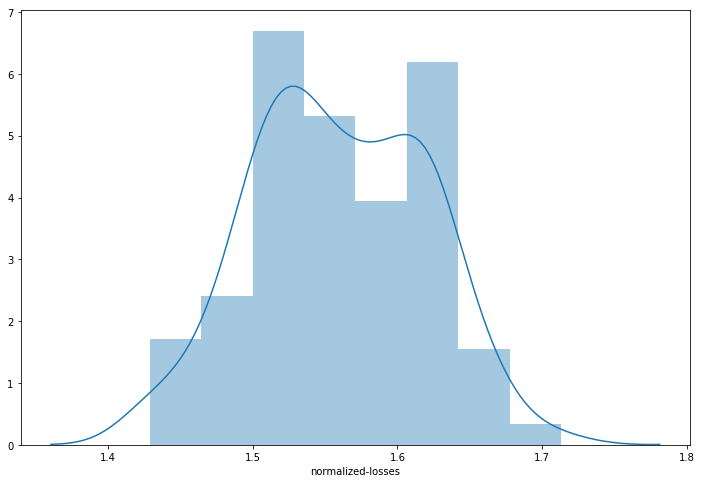

In [123]:
plt.figure(figsize=(12,8))
sns.distplot(log_data['normalized-losses'])

#### looks better, so decide to take log to target values

In [124]:
raw_data['normalized-losses'] = np.log(raw_data['normalized-losses'])

# 3. Detecting Outliers Before Modeling

In [125]:
## to ignore that column
outdata = raw_data.drop('symboling', axis=1)

In [126]:
num_col = outdata.select_dtypes(include=[np.number]).columns.tolist()
print(num_col)

['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


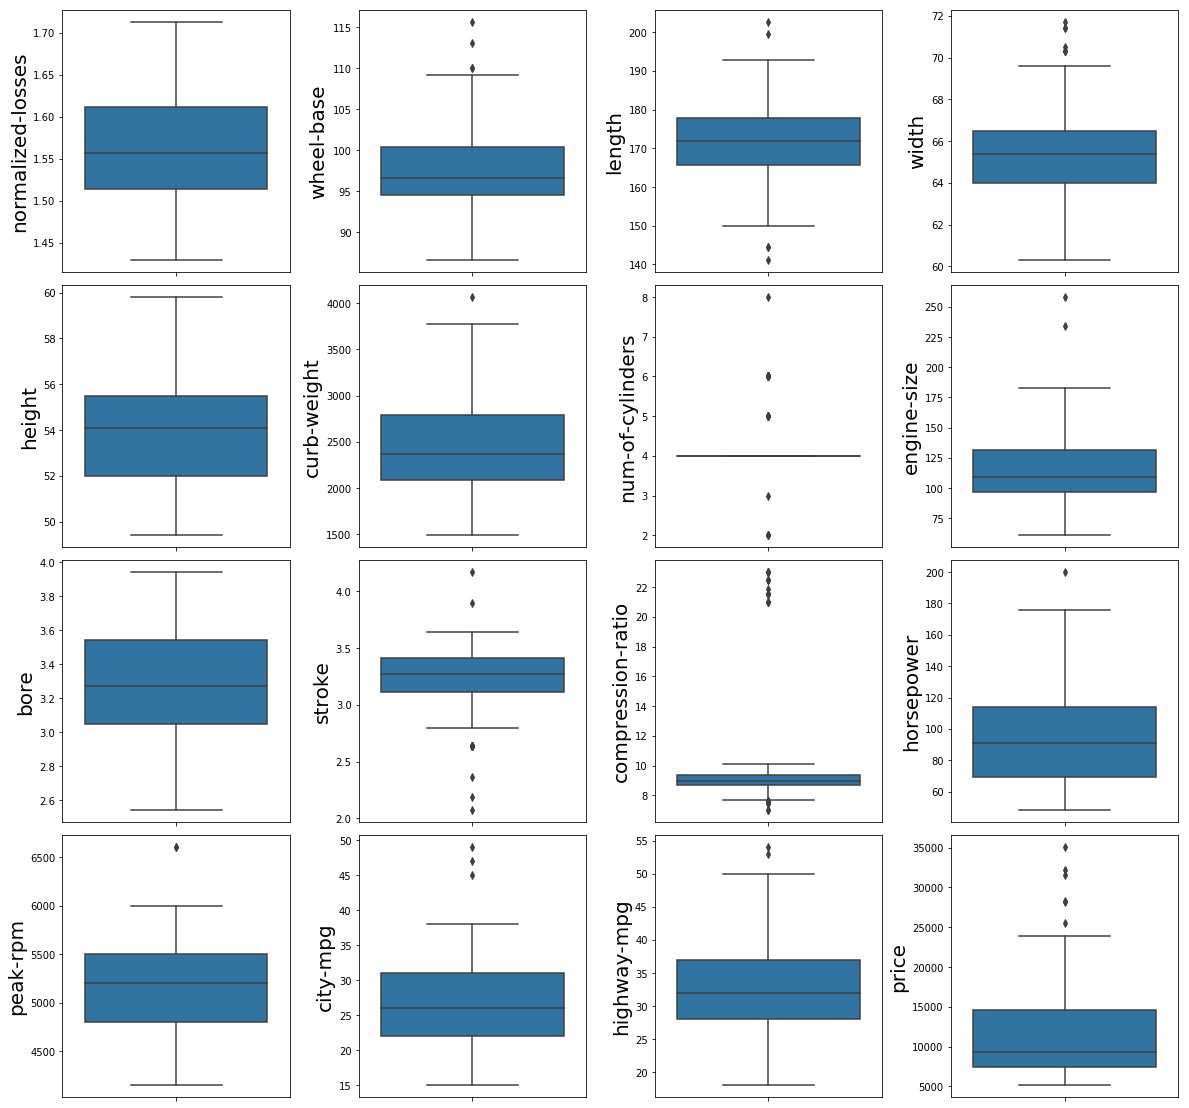

In [127]:
rows = 4
if((((len(num_col) + 1) // rows) % rows) == 0): 
    cols = (len(num_col)+1) // rows
else:
    cols = ((len(num_col)+1) // rows) + ((len(num_col) // rows) % rows)

fig, axs = plt.subplots(rows, cols, figsize=(20,20))
fig.subplots_adjust(hspace = 0.05, wspace=0.3)
axs = axs.ravel()
for j,k in enumerate(num_col):
    b = sns.boxplot(y = k, data=raw_data,ax = axs[j],)
    b.set_ylabel(k,fontsize=20)

### with this plots, I started to delete those outliers

In [128]:
len(raw_data[raw_data['curb-weight'] > 3750])

2

In [129]:
outdata.drop(outdata[outdata['curb-weight'] > 3750].index, inplace=True)

In [130]:
len(outdata)

162

In [131]:
len(raw_data[raw_data['width'] > 70])

7

In [132]:
outdata.drop(outdata[outdata['width'] > 70].index, inplace=True)

In [133]:
len(raw_data[raw_data['length'] > 190])

6

In [134]:
len(raw_data[raw_data['length'] < 150])

3

In [135]:
len(raw_data[raw_data['wheel-base'] > 110])

2

In [136]:
outdata.drop(outdata[outdata['wheel-base'] > 110].index, inplace=True)

In [137]:
len(outdata)

156

In [138]:
len(raw_data[raw_data['price'] > 25000])

6

In [139]:
len(raw_data[raw_data['engine-size'] > 225])

2

In [140]:
outdata.drop(outdata[outdata['engine-size'] > 160].index, inplace=True)

In [141]:
outdata.drop(outdata[outdata['city-mpg'] > 46].index, inplace=True)

In [142]:
len(outdata)

142

In [143]:
outdata.drop(outdata[outdata['horsepower'] > 150].index, inplace=True)

In [144]:
len(outdata)

137

In [145]:
data = outdata.copy()

In [146]:
data.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,1.629214,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,4,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,1.629214,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,5,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
10,1.659655,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395.0,ohc,4,108.0,mpfi,3.50,2.80,8.8,101.0,5800.0,23.0,29.0,16430.0
11,1.659655,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395.0,ohc,4,108.0,mpfi,3.50,2.80,8.8,101.0,5800.0,23.0,29.0,16925.0
19,1.522783,chevrolet,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,52.0,1874.0,ohc,4,90.0,2bbl,3.03,3.11,9.6,70.0,5400.0,38.0,43.0,6295.0


# 4. Normalization numeric features

In [147]:
from sklearn.preprocessing import Normalizer

In [148]:
data.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,1.629214,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,4,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,1.629214,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,5,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
10,1.659655,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395.0,ohc,4,108.0,mpfi,3.50,2.80,8.8,101.0,5800.0,23.0,29.0,16430.0
11,1.659655,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395.0,ohc,4,108.0,mpfi,3.50,2.80,8.8,101.0,5800.0,23.0,29.0,16925.0
19,1.522783,chevrolet,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,52.0,1874.0,ohc,4,90.0,2bbl,3.03,3.11,9.6,70.0,5400.0,38.0,43.0,6295.0


In [149]:
normal_col = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [150]:
nm = Normalizer()

In [151]:
d = nm.fit(data[normal_col])

In [152]:
data[normal_col] = d.transform(data[normal_col])

In [153]:
data.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,1.629214,audi,gas,std,four,sedan,fwd,front,0.006575,0.011635,0.004361,0.003577,0.153968,ohc,4,0.007181,mpfi,0.000210,0.000224,0.000659,0.006720,0.362355,0.001581,0.001976,0.919064
4,1.629214,audi,gas,std,four,sedan,4wd,front,0.005369,0.009538,0.003586,0.002933,0.152524,ohc,5,0.007345,mpfi,0.000172,0.000184,0.000432,0.006211,0.297055,0.000972,0.001188,0.942475
10,1.659655,bmw,gas,std,two,sedan,rwd,front,0.005753,0.010051,0.003684,0.003087,0.136160,ohc,4,0.006140,mpfi,0.000199,0.000159,0.000500,0.005742,0.329741,0.001308,0.001649,0.934076
11,1.659655,bmw,gas,std,four,sedan,rwd,front,0.005606,0.009793,0.003589,0.003008,0.132666,ohc,4,0.005982,mpfi,0.000194,0.000155,0.000487,0.005595,0.321280,0.001274,0.001606,0.937528
19,1.522783,chevrolet,gas,std,two,hatchback,fwd,front,0.011110,0.018328,0.007477,0.006113,0.220310,ohc,4,0.010581,2bbl,0.000356,0.000366,0.001129,0.008229,0.634832,0.004467,0.005055,0.740049


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 3 to 204
Data columns (total 25 columns):
normalized-losses    137 non-null float64
make                 137 non-null object
fuel-type            137 non-null object
aspiration           137 non-null object
num-of-doors         137 non-null object
body-style           137 non-null object
drive-wheels         137 non-null object
engine-location      137 non-null object
wheel-base           137 non-null float64
length               137 non-null float64
width                137 non-null float64
height               137 non-null float64
curb-weight          137 non-null float64
engine-type          137 non-null object
num-of-cylinders     137 non-null int64
engine-size          137 non-null float64
fuel-system          137 non-null object
bore                 137 non-null float64
stroke               137 non-null float64
compression-ratio    137 non-null float64
horsepower           137 non-null float64
peak-rpm             137

# 5. One-hot encoding

In [155]:
data_onehot = data.copy()

In [156]:
cate_cols = ["make", "fuel-type",'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location','engine-type', 'num-of-cylinders','fuel-system']

In [157]:
data_onehot = pd.get_dummies(data, columns=cate_cols, prefix=cate_cols)

In [158]:
data = data_onehot.reset_index(drop=True)

In [159]:
data.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_mazda,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_rotor,num-of-cylinders_2,num-of-cylinders_4,num-of-cylinders_5,num-of-cylinders_6,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi
0,1.629214,0.006575,0.011635,0.004361,0.003577,0.153968,0.007181,0.000210,0.000224,0.000659,0.006720,0.362355,0.001581,0.001976,0.919064,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1.629214,0.005369,0.009538,0.003586,0.002933,0.152524,0.007345,0.000172,0.000184,0.000432,0.006211,0.297055,0.000972,0.001188,0.942475,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,1.659655,0.005753,0.010051,0.003684,0.003087,0.136160,0.006140,0.000199,0.000159,0.000500,0.005742,0.329741,0.001308,0.001649,0.934076,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,1.659655,0.005606,0.009793,0.003589,0.003008,0.132666,0.005982,0.000194,0.000155,0.000487,0.005595,0.321280,0.001274,0.001606,0.937528,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1.522783,0.011110,0.018328,0.007477,0.006113,0.220310,0.010581,0.000356,0.000366,0.001129,0.008229,0.634832,0.004467,0.005055,0.740049,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


# 6. Modeling & Evaluation with MSE

In [160]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [161]:
X = data.drop(columns='normalized-losses')
y = data['normalized-losses']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Randomforest regressor

In [163]:
model = RandomForestRegressor(n_jobs=-1, n_estimators=250)

In [164]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [165]:
y_pred = model.predict(X_test) 

In [180]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
print('MSE : {:.6f}'.format(mse))

MSE : 0.001434
